In [453]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from numpy.polynomial.polynomial import polyfit, polyval
from sklearn.metrics import root_mean_squared_error
from seaborn import regplot
import scipy.stats as stats
from scipy.stats import ttest_ind


In [455]:
cases = pd.read_csv('./data/weekly_cases.csv', index_col=0)
deaths = pd.read_csv('./data/weekly_deaths.csv', index_col=0)

In [457]:
state = 'NC'

In [459]:
nccases = cases[cases['State'] == state].drop(columns=['State', 'StateFIPS'])
ncdeaths = deaths[deaths['State'] == state].drop(columns=['State', 'StateFIPS'])
nccases = nccases.iloc[1:]
ncdeaths = ncdeaths.iloc[1:]

In [461]:
nccasesums = nccases[nccases.columns[3:]].sum()
ncdeathsums = ncdeaths[ncdeaths.columns[3:]].sum()
ncnewcases = nccasesums.diff()[1:]
ncnewdeaths = ncdeathsums.diff()[1:]

### Linear Model

In [464]:
x = np.arange(len(ncnewcases)) * 7
cases_linear = LinearRegression()
deaths_linear = LinearRegression()
reshape = lambda a: a.copy().reshape(-1, 1)
cases_linear.fit(reshape(x), ncnewcases)
deaths_linear.fit(reshape(x), ncnewdeaths)

LinearRegression()

In [466]:
x_ext = np.arange(len(ncnewcases) + 1) * 7
cases_pred_linear = cases_linear.predict(reshape(x))
deaths_pred_linear = deaths_linear.predict(reshape(x))

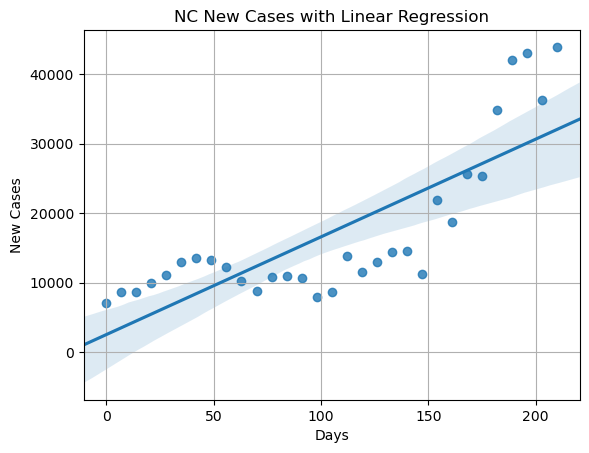

In [468]:
ax = regplot(ncnewcases, x=x, y=ncnewcases, label='Cases', truncate=False)
ax.set_title('NC New Cases with Linear Regression')
ax.set_xlabel('Days')
ax.set_ylabel('New Cases')
plt.grid()
plt.show()

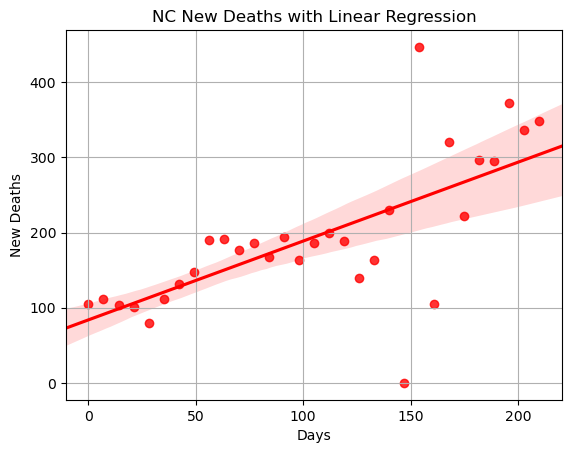

In [469]:
ax = regplot(ncnewdeaths, x=x, y=ncnewdeaths, label='Deaths', truncate=False, color='red')
ax.set_title('NC New Deaths with Linear Regression')
ax.set_xlabel('Days')
ax.set_ylabel('New Deaths')
plt.grid()
plt.show()

### Polynomial Degree 2

In [473]:
cases_poly2 = polyfit(x, ncnewcases, 2)
deaths_poly2 = polyfit(x, ncnewdeaths, 2)

cases_pred_poly2 = polyval(x, cases_poly2)
deaths_pred_poly2 = polyval(x, deaths_poly2)

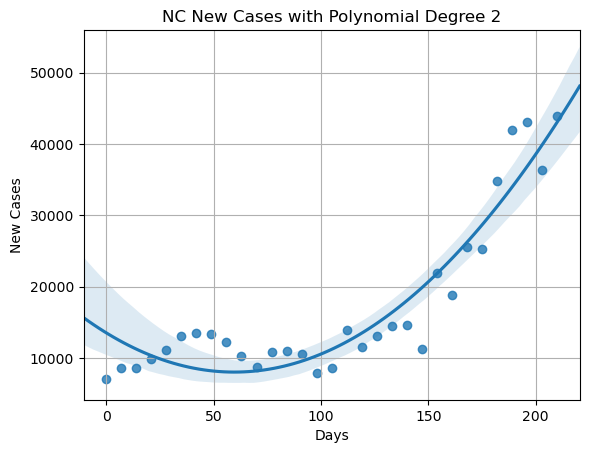

In [475]:
ax = regplot(ncnewcases, x=x, y=ncnewcases, order=2, label='Trendline', truncate=False)
ax.set_title('NC New Cases with Polynomial Degree 2')
ax.set_xlabel('Days')
ax.set_ylabel('New Cases')
plt.grid()
plt.show()

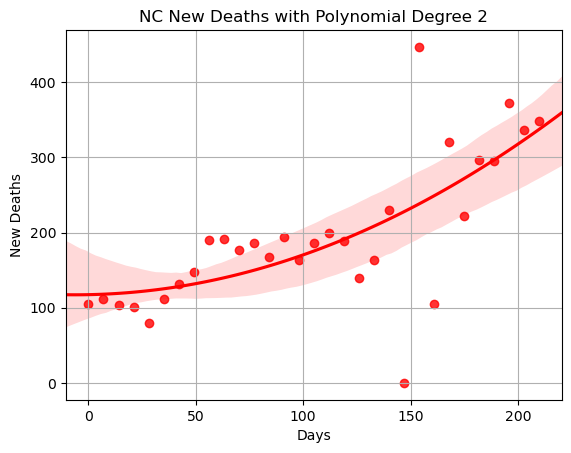

In [476]:
ax = regplot(ncnewdeaths, x=x, y=ncnewdeaths, order=2, label='Trendline', truncate=False, color='red')
ax.set_title('NC New Deaths with Polynomial Degree 2')
ax.set_xlabel('Days')
ax.set_ylabel('New Deaths')
plt.grid()
plt.show()

### Polynomial Degree 3

In [480]:
cases_poly3 = polyfit(x, ncnewcases, 3)
deaths_poly3 = polyfit(x, ncnewdeaths, 3)

cases_pred_poly3 = polyval(x, cases_poly3)
deaths_pred_poly3 = polyval(x, deaths_poly3)

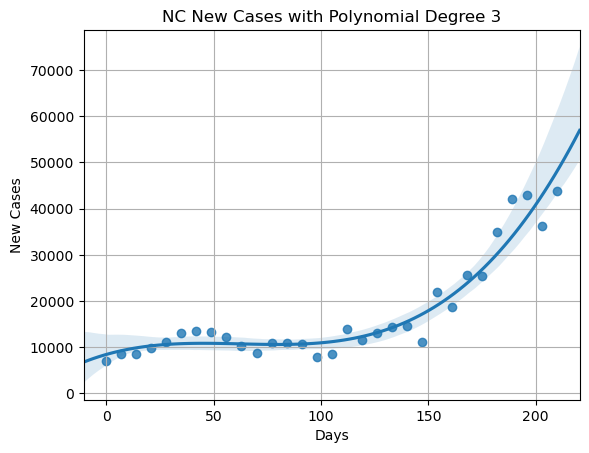

In [482]:
ax = regplot(ncnewcases, x=x, y=ncnewcases, order=3, label='Trendline', truncate=False)
ax.set_title('NC New Cases with Polynomial Degree 3')
ax.set_xlabel('Days')
ax.set_ylabel('New Cases')
plt.grid()
plt.show()

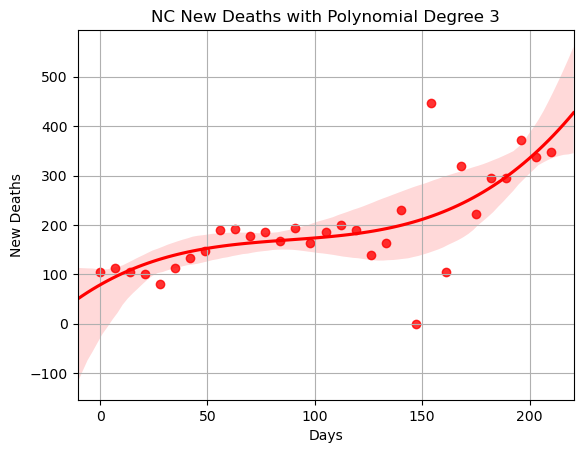

In [483]:
ax = regplot(ncnewdeaths, x=x, y=ncnewdeaths, order=3, label='Trendline', truncate=False, color='red')
ax.set_title('NC New Deaths with Polynomial Degree 3')
ax.set_xlabel('Days')
ax.set_ylabel('New Deaths')
plt.grid()
plt.show()

### Root Mean Squared Error of Models

In [487]:
# Linear
linear_cases_rmse = root_mean_squared_error(ncnewcases, cases_pred_linear)
linear_deaths_rmse = root_mean_squared_error(ncnewdeaths, deaths_pred_linear)
# Polynomial degree 2
poly2_cases_rmse = root_mean_squared_error(ncnewcases, cases_pred_poly2)
poly2_deaths_rmse = root_mean_squared_error(ncnewdeaths, deaths_pred_poly2)
# Polynomial degree 3
poly3_cases_rmse = root_mean_squared_error(ncnewcases, cases_pred_poly3)
poly3_deaths_rmse = root_mean_squared_error(ncnewdeaths, deaths_pred_poly3)

data = {
    'Model': ['Linear', 'Polynomial Degree 2', 'Polynomial Degree 3'],
    'Cases RMSE': [linear_cases_rmse, poly2_cases_rmse, poly3_cases_rmse],
    'Deaths RMSE': [linear_deaths_rmse, poly2_deaths_rmse, poly3_deaths_rmse]
}

rmse_df = pd.DataFrame(data).set_index('Model')

rmse_df

,Cases RMSE,Deaths RMSE
Model,,
Linear,6620.185602,70.366123
Polynomial Degree 2,3793.791999,68.400296
Polynomial Degree 3,2991.614752,66.043720


## Find the top 5 counties in North Carolina with the highest risk of infection and analyze the trend of cases in those counties

In [490]:
last_week = cases.columns[-1]
top_5_counties = nccases.sort_values(by=last_week, ascending=False).set_index('County Name').drop(columns=['countyFIPS'])
top_5_counties = top_5_counties.head(5)
top_5_counties

,population,2020-06-01 00:00:00,2020-06-08 00:00:00,2020-06-15 00:00:00,2020-06-22 00:00:00,2020-06-29 00:00:00,2020-07-06 00:00:00,2020-07-13 00:00:00,2020-07-20 00:00:00,2020-07-27 00:00:00,...,2020-11-02 00:00:00,2020-11-09 00:00:00,2020-11-16 00:00:00,2020-11-23 00:00:00,2020-11-30 00:00:00,2020-12-07 00:00:00,2020-12-14 00:00:00,2020-12-21 00:00:00,2020-12-28 00:00:00,2021-01-03 00:00:00
County Name,,,,,,,,,,,,,,,,,,,,,
Mecklenburg County,1110356,4412,5682,7321,8956,10863,13111,15319,17571,19480,...,34371,36464,38486,41073,43661,47547,51896,56558,60618,65134
Wake County,1111761,1773,2300,3099,3984,4952,6150,7640,8897,10119,...,21411,23223,24772,26635,28758,32111,35343,38864,41823,45725
Guilford County,537174,1288,1665,2061,2434,2775,3149,3682,4198,4789,...,11808,13032,14139,15485,16849,18417,20364,22285,23810,25761
Forsyth County,382295,1383,1816,2250,2575,2978,3353,3731,4220,4607,...,9103,10050,11004,12249,13421,14919,16785,18586,19947,21367
Gaston County,224529,286,366,525,771,1041,1385,1859,2320,2736,...,7657,8356,8965,9637,10276,11286,12534,13755,14907,16321


In [492]:
top_5_counties_normalized = top_5_counties.copy()[top_5_counties.columns[1:]].div(top_5_counties['population'], axis=0) * 100000
top_5_counties_normalized = np.log1p(top_5_counties_normalized)
top5new = top_5_counties_normalized.diff(axis=1)
top5new = top5new.dropna(axis=1)
top5new

,2020-06-08 00:00:00,2020-06-15 00:00:00,2020-06-22 00:00:00,2020-06-29 00:00:00,2020-07-06 00:00:00,2020-07-13 00:00:00,2020-07-20 00:00:00,2020-07-27 00:00:00,2020-08-03 00:00:00,2020-08-10 00:00:00,...,2020-11-02 00:00:00,2020-11-09 00:00:00,2020-11-16 00:00:00,2020-11-23 00:00:00,2020-11-30 00:00:00,2020-12-07 00:00:00,2020-12-14 00:00:00,2020-12-21 00:00:00,2020-12-28 00:00:00,2021-01-03 00:00:00
County Name,,,,,,,,,,,,,,,,,,,,,
Mecklenburg County,0.252414,0.253007,0.201300,0.192821,0.187914,0.155520,0.137063,0.103077,0.075807,0.059992,...,0.032276,0.059094,0.053953,0.065038,0.061088,0.085243,0.087503,0.086007,0.069312,0.071842
Wake County,0.258807,0.296929,0.250412,0.216961,0.216224,0.216594,0.152111,0.128550,0.104510,0.072200,...,0.030620,0.081198,0.064541,0.072481,0.076659,0.110242,0.095870,0.094940,0.073358,0.089176
Guilford County,0.255794,0.212748,0.165946,0.130844,0.126205,0.156125,0.130973,0.131556,0.092569,0.076124,...,0.052839,0.098588,0.081497,0.090902,0.084391,0.088956,0.100467,0.090122,0.066176,0.078739
Forsyth County,0.271724,0.213889,0.134705,0.145202,0.118460,0.106705,0.123040,0.087666,0.072762,0.064616,...,0.044917,0.098929,0.090653,0.107150,0.091349,0.105786,0.117822,0.101901,0.070656,0.068756
Gaston County,0.244937,0.358917,0.382930,0.299495,0.284984,0.293926,0.221289,0.164783,0.103634,0.095393,...,0.055568,0.087335,0.070330,0.072264,0.064187,0.093732,0.104862,0.092942,0.080416,0.090609


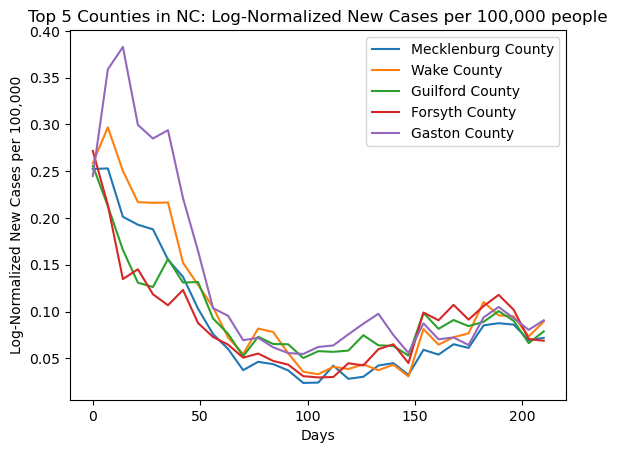

In [494]:
plt.plot(x, top5new.T)
plt.legend(top_5_counties.index)
plt.title('Top 5 Counties in NC: Log-Normalized New Cases per 100,000 people')
plt.xlabel('Days')
plt.ylabel('Log-Normalized New Cases per 100,000')
plt.show()

### Polynomial Degree 3 Regression to Analyze Trends

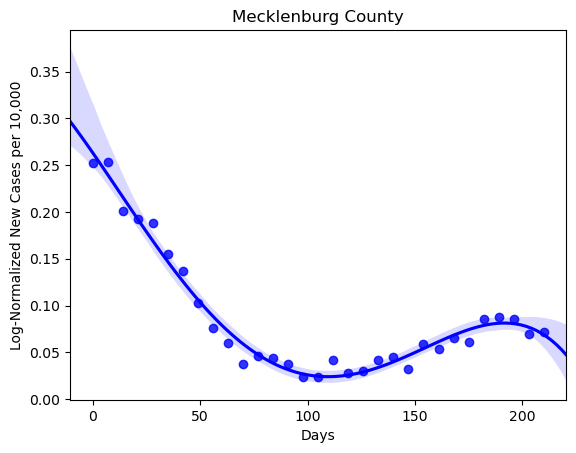

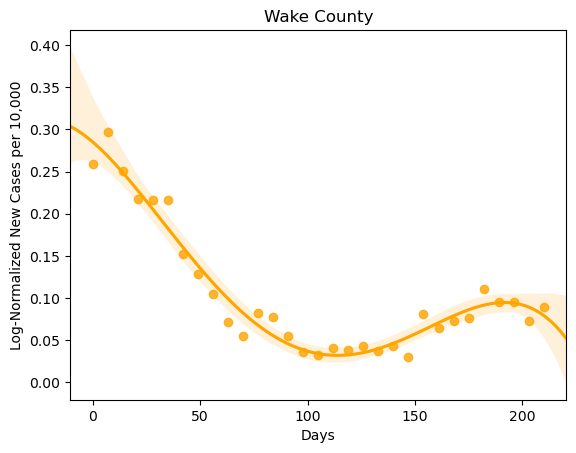

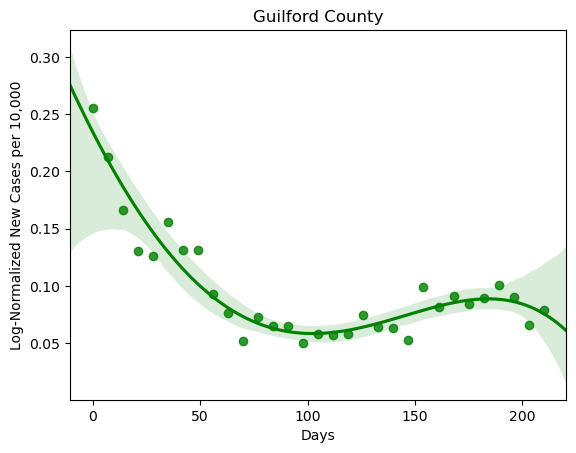

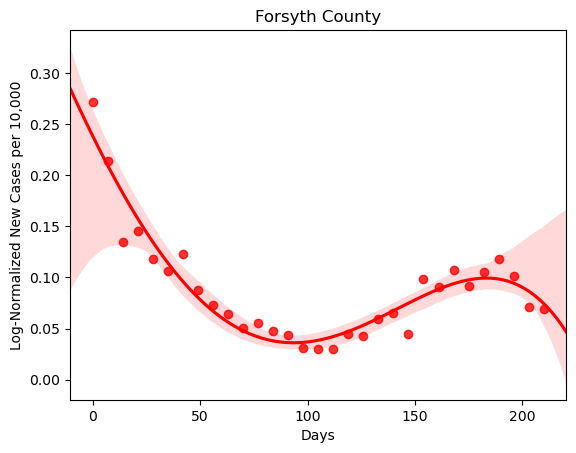

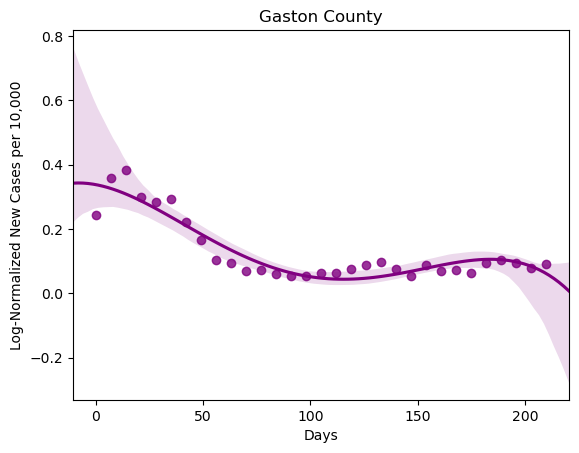

In [497]:
colors = ['blue', 'orange', 'green', 'red', 'purple']
for county, color in zip(top_5_counties_new.index, colors):
    plt.figure()
    y = top_5_counties_new.loc[county]
    regplot(y=y, x=x, order=4, label='Trendline', truncate=False, color=color)
    plt.title(f'{county}')
    plt.xlabel('Days')
    plt.ylabel('Log-Normalized New Cases per 10,000')
    plt.show()

### As we can see, all the graphs begin trending down before a small spike between 150-200. This is near the end of the year, when it's more common for people to get together.

In [498]:
edu = pd.read_csv("./data/nceducation.csv")

## Hypothesis:
### 1.) Lower rates of college enrollment from the younger generation may lead to a higher number of cases.
### 2.) Lower rates of college enrollment from the older generation may lead to a higher number of cases.
### 3.) Higher rates of college enrollment may lead to a higher percentage of infection.

In [500]:
edu
eduinfo = pd.DataFrame()
eduinfo['Under 24, no college'] = edu[['18-24 - less than high school education %', '18-24 - High school grad %']].sum(axis=1)
eduinfo['Under 24, college'] = edu[["18-24 - Some college or associate's %", "18-24 - Bachelor's degree %"]].sum(axis=1)
eduinfo['Over 24, no college'] = edu[['25 and up - less than 9th grade. %', '25 and up - between 9th and 12th grade %', '25 and up - high school grad %']].sum(axis=1)
eduinfo['Over 24, college'] = edu[["25 and up - Associate's degree %", "25 and up - Bachelor's degree %"]].sum(axis=1)
eduinfo['County Name'] = edu['County Name']
eduinfo.set_index('County Name', inplace=True)

In [501]:
nccases['infected%'] = nccases[nccases.columns[-1]] / nccases['population'] * 100
just_cases = nccases.set_index('County Name').drop(columns=['countyFIPS', 'population'])
just_cases
hypo = eduinfo.join(just_cases, how='inner')

### Hypothesis 1: Lower rates of college enrollment from the younger generation may lead to a higher number of cases.
#### Null Hypothesis: The number of covid cases is not significantly related to college enrollment.
#### 2 Sided Test

In [507]:
college = hypo[hypo['Under 24, college'] > 50].iloc[:, -1]
nocollege = hypo[hypo['Under 24, no college'] > 50].iloc[:, -1]
_, p_val = stats.ttest_ind(college, nocollege, equal_var=False, alternative='two-sided')
print(f'P-value: {p_val}')
print(f'Reject Null Hypothesis: {p_val < 0.05}')

P-value: 0.11344480011779233
Reject Null Hypothesis: False


##### We accept the null hypothesis that the number of covid cases is not significantly related between those with or without college education.

#### 1 Sided Test

In [511]:
college1 = hypo[hypo['Under 24, college'] > 50].iloc[:, -1]
nocollege1 = hypo[hypo['Under 24, no college'] > 50].iloc[:, -1]
_, p_val = stats.ttest_ind(college1, nocollege1, equal_var=False, alternative='greater')
print(f'P-value: {p_val}')
print(f'Reject Null Hypothesis: {p_val < 0.05}')

P-value: 0.9432775999411038
Reject Null Hypothesis: False


##### We accept the null hypothesis that the number of covid cases is not significantly different between those with or without college education.

### Hypothesis 2: Lower rates of college enrollment from the older generation may lead to a higher number of cases.
#### Null Hypothesis: The number of covid cases is not significantly related to college enrollment.
#### 2 Sided Test

In [515]:
college2 = hypo[hypo['Under 24, college'] > 50].iloc[:, -1]
nocollege2 = hypo[hypo['Over 24, no college'] > 50].iloc[:, -1]
_, p_val = stats.ttest_ind(college2, nocollege2, equal_var=False, alternative='two-sided')
print(f'P-value: {p_val}')
print(f'Reject Null Hypothesis: {p_val < 0.05}')

P-value: 0.005658052423479413
Reject Null Hypothesis: True


##### We accept the null hypothesis that the number of covid cases is not significantly different between younger college educated people and older people with no college education.

#### 2 Sided Test

In [519]:
college2 = hypo[hypo['Under 24, college'] > 50].iloc[:, -1]
nocollege2 = hypo[hypo['Over 24, no college'] > 50].iloc[:, -1]
_, p_val = stats.ttest_ind(college2, nocollege2, equal_var=False, alternative='greater')
print(f'P-value: {p_val}')
print(f'Reject Null Hypothesis: {p_val < 0.05}')

P-value: 0.9971709737882604
Reject Null Hypothesis: False


##### We accept the null hypothesis that the number of covid cases is not significantly different between younger college educated people and older people with no college education.

### Hypothesis 3: Higher rates of college enrollment may lead to a higher percentage of infection.
#### Null Hypothesis: The percentage of infection is not significantly related to college enrollment.
#### 2 Sided Test

In [523]:
cinfected = hypo[hypo['Under 24, no college'] > 50]['infected%']
cinfected2 = hypo[hypo['Under 24, college'] > 50]['infected%']
_, p_val = stats.ttest_ind(cinfected, cinfected2, equal_var=False, alternative='two-sided')
print(f'P-value: {p_val}')
print(f'Reject Null Hypothesis: {p_val < 0.05}')

P-value: 0.11344480011779233
Reject Null Hypothesis: False


##### We accept the null hypothesis that the percentage of infection is not significantly related to college enrollment.

#### 1 Sided Test

In [527]:
cinfected = hypo[hypo['Under 24, no college'] > 50]['infected%']
cinfected2 = hypo[hypo['Under 24, college'] > 50]['infected%']
_, p_val = stats.ttest_ind(cinfected, cinfected2, equal_var=False, alternative='greater')
print(f'P-value: {p_val}')
print(f'Reject Null Hypothesis: {p_val < 0.05}')

P-value: 0.056722400058896165
Reject Null Hypothesis: False


##### We accept the null hypothesis that the percentage of infection is not significantly related to college enrollment.